In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from os.path import expanduser

In [2]:
experiment_base_dir = '/media/big-ssd/experiments'
experiment_name = 'P3856'
feature_detection_method = 'pasef'

EXPERIMENT_DIR = "{}/{}".format(experiment_base_dir, experiment_name)

IDENTIFICATIONS_DIR = '{}/identifications-{}-cs-true-fmdw-true'.format(expanduser("~"), feature_detection_method)
IDENTIFICATIONS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_DIR, experiment_name, feature_detection_method)

In [3]:
with open(IDENTIFICATIONS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_df = d['identifications_df']

In [4]:
MAXIMUM_Q_VALUE = 0.01

In [5]:
identifications_with_low_qvalue_df = identifications_df[(identifications_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [6]:
print('there are {} identifications, {} with q-value less than {}'.format(len(identifications_df), len(identifications_with_low_qvalue_df), MAXIMUM_Q_VALUE))

there are 26513 identifications, 3761 with q-value less than 0.01


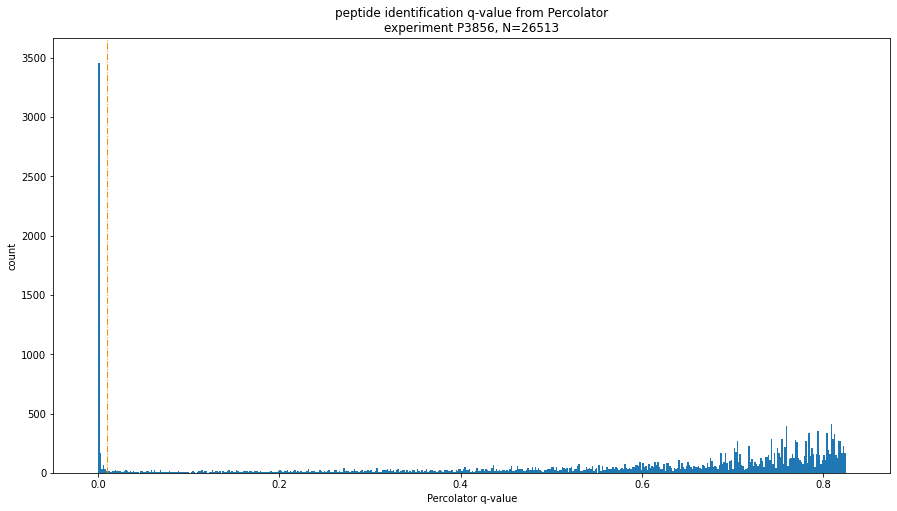

In [7]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 500
values = identifications_df['percolator q-value']
y, x, _ = ax1.hist(values, bins=bins)

ax1.axvline(0.01, color='darkorange', lw=1.0, ls='-.')

plt.xlabel('Percolator q-value')
plt.ylabel('count')
plt.title('peptide identification q-value from Percolator\nexperiment {}, N={}'.format(experiment_name,len(identifications_df)))
# plt.xlim((0,0.1))
# plt.ylim((0,1000))

plt.show()

In [8]:
sequences_l = []
for group_name,group_df in identifications_with_low_qvalue_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    sequences_l.append((sequence,charge,len(group_df)))
sequences_df = pd.DataFrame(sequences_l, columns=['sequence','charge','duplicate_ident'])

In [9]:
print('there are {} unique sequences in the low q-value identifications (q-value <= {})'.format(len(sequences_df), MAXIMUM_Q_VALUE))

there are 3130 unique sequences in the low q-value identifications (q-value <= 0.01)


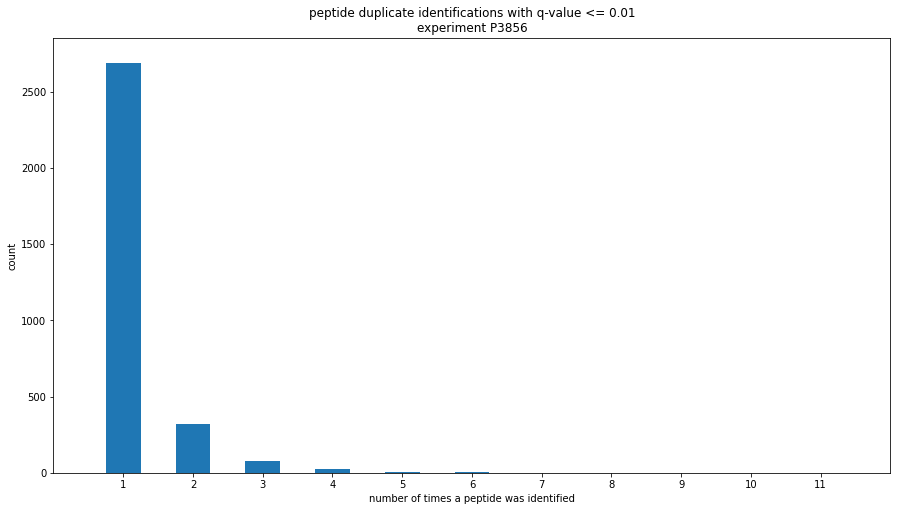

In [10]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

counts = np.bincount(sequences_df.duplicate_ident)
ax1.bar(range(sequences_df.duplicate_ident.max()+1), counts, width=0.5, align='center')
ax1.set(xticks=range(1,sequences_df.duplicate_ident.max()+1), xlim=[0, sequences_df.duplicate_ident.max()+1])

plt.xlabel('number of times a peptide was identified')
plt.ylabel('count')
plt.title('peptide duplicate identifications with q-value <= {}\nexperiment {}'.format(MAXIMUM_Q_VALUE, experiment_name))

plt.show()

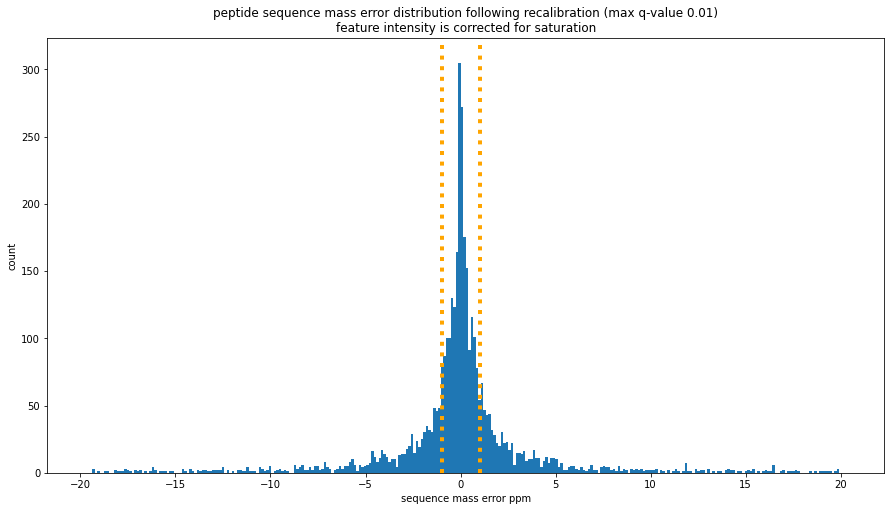

In [11]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('peptide sequence mass error distribution following recalibration (max q-value {})\nfeature intensity is corrected for saturation'.format(MAXIMUM_Q_VALUE))

bins = 300
hist, bins, _ = plt.hist(identifications_with_low_qvalue_df.mass_accuracy_ppm, bins=bins)
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

# plt.xlim((-20,20))
# plt.ylim((0,1200))

plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()